In [1]:
# 1. Importar las bibliotecas necesarias
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

# 2. Cargar los datos

wine = load_wine()
X = wine.data
y = wine.target

# 3. Preprocesar los datos
# Dividir los datos en un conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# 1. Crear el objeto del árbol de decisión
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5)

# 2. Entrenar el modelo
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

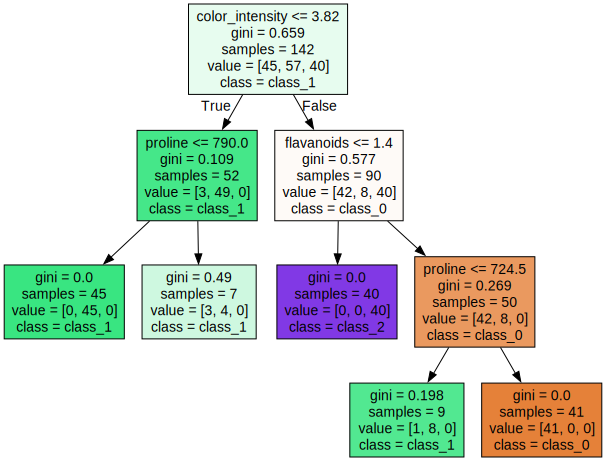

In [3]:
# 1. Importar las herramientas de visualización necesarias
from sklearn.tree import export_graphviz
import graphviz 

# 2. Visualizar el árbol
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=wine.feature_names,  
                           class_names=wine.target_names,  
                           filled=True)
graph = graphviz.Source(dot_data)  
graph


In [4]:
# Evaluacion

# Hacemos predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculamos la precisión en los conjuntos de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Exactitud en el conjunto de entrenamiento: {train_accuracy}')
print(f'Exactitud en el conjunto de prueba: {test_accuracy}')

Exactitud en el conjunto de entrenamiento: 0.971830985915493
Exactitud en el conjunto de prueba: 0.9444444444444444


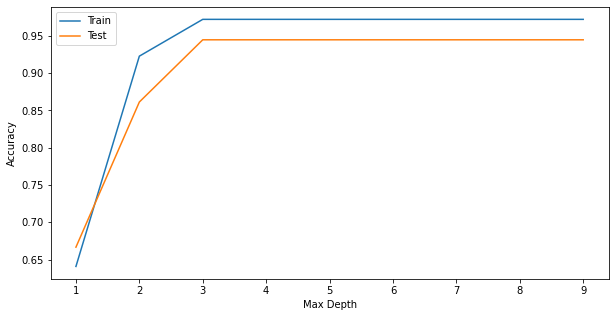

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Listas para guardar los resultados de precisión
train_accuracies = []
test_accuracies = []

# Rango de valores de profundidad que queremos probar
max_depths = np.arange(1, 10)

# Realizamos el análisis para cada valor de profundidad
for max_depth in max_depths:
    # Creamos y entrenamos el modelo
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=5, min_samples_leaf=5, random_state=42)
    clf.fit(X_train, y_train)
    
    # Hacemos las predicciones
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculamos la precisión y la añadimos a las listas correspondientes
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Graficamos los resultados
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_accuracies, label='Train')
plt.plot(max_depths, test_accuracies, label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
# Realizamos las predicciones
y_train_proba = clf.predict_proba(X_train)
y_test_proba = clf.predict_proba(X_test)

# Transformamos las etiquetas a formato binario para el cálculo de log-loss
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

# Calculamos la puntuación log-loss
log_loss_train = log_loss(y_train_bin, y_train_proba)
log_loss_test = log_loss(y_test_bin, y_test_proba)

print(f"Log-loss en el conjunto de entrenamiento: {log_loss_train}")
print(f"Log-loss en el conjunto de prueba: {log_loss_test}")

Log-loss en el conjunto de entrenamiento: 0.05577356053162431
Log-loss en el conjunto de prueba: 1.0345638987909311


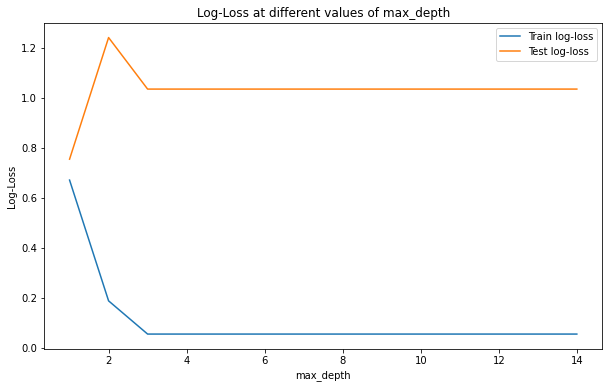

In [7]:
# Definimos los rangos para los hiperparámetros
max_depth_range = np.arange(1, 15)

# Inicializamos las listas para almacenar las puntuaciones
train_log_losses = []
test_log_losses = []

# Transformamos las etiquetas a formato binario para el cálculo de log-loss
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

# Calculamos las puntuaciones para cada valor de max_depth
for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=max_depth,  min_samples_split=5, min_samples_leaf=5,random_state=42)
    clf.fit(X_train, y_train)
    
    y_train_proba = clf.predict_proba(X_train)
    y_test_proba = clf.predict_proba(X_test)
    
    train_log_loss = log_loss(y_train_bin, y_train_proba)
    test_log_loss = log_loss(y_test_bin, y_test_proba)
    
    train_log_losses.append(train_log_loss)
    test_log_losses.append(test_log_loss)

# Creamos la gráfica
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_log_losses, label='Train log-loss')
plt.plot(max_depth_range, test_log_losses, label='Test log-loss')
plt.xlabel('max_depth')
plt.ylabel('Log-Loss')
plt.title('Log-Loss at different values of max_depth')
plt.legend()
plt.show()

**Ejercicios**

- Varíe los otros hiperparámetros, grafique
- Haga pre-prodas o post-podas para evitar el sobreajuste
